In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import cv2
from PIL import Image
import pylab

# Add the path to the src folder to the python path
sys.path.append(os.path.abspath("../src"))
from optimizer import (
    FistaBT,
    FistaMod,
    GreedyFISTA,
    RestartingFISTA,
    OptimizationParams,
)

from problems import lasso_problem

import visualization as vis

In [9]:
dim = 2  # Dimension of the problem
mu = 1  # Regularization parameter
gamma = 0.0001  # Step size
x0 = np.random.randn(dim)  # Initial point

params = OptimizationParams(
    dim=dim,
    mu=mu,
    gamma=gamma,
    x0=x0,
    verbose=False,
)
print(x0)

[-1.05126     1.22084425]


In [10]:
lasso = lasso_problem(dim=dim)

# FISTA-BT


In [11]:
fista_bt = FistaBT(params)

In [12]:
x, history = fista_bt.optimize(*lasso)
print(f"Optimal point: {x}")

Optimal point: [ 0.32976934 -0.71126729]


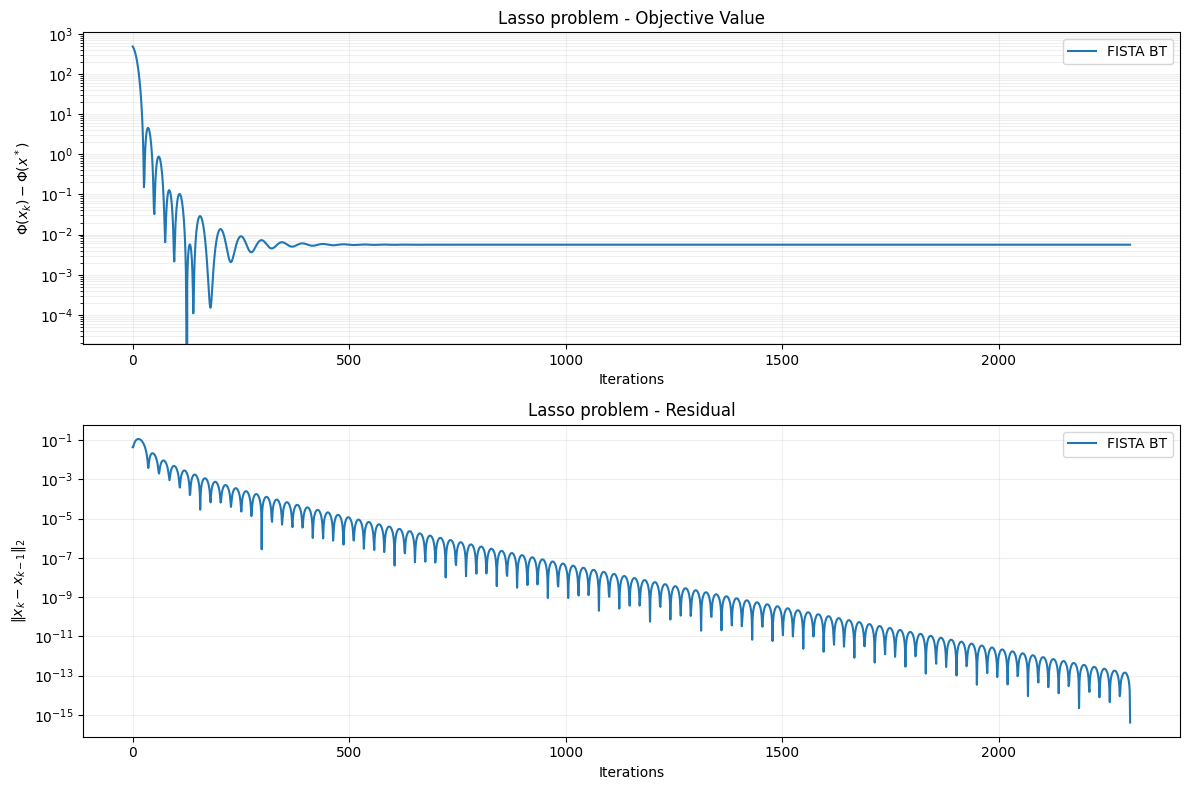

In [13]:
vis.plot_convergence([history], labels=["FISTA BT"], title="Lasso problem")

# FISTA-Mod


In [14]:
fista_mod = FistaMod(params)

In [15]:
x, history = fista_mod.optimize(*lasso)

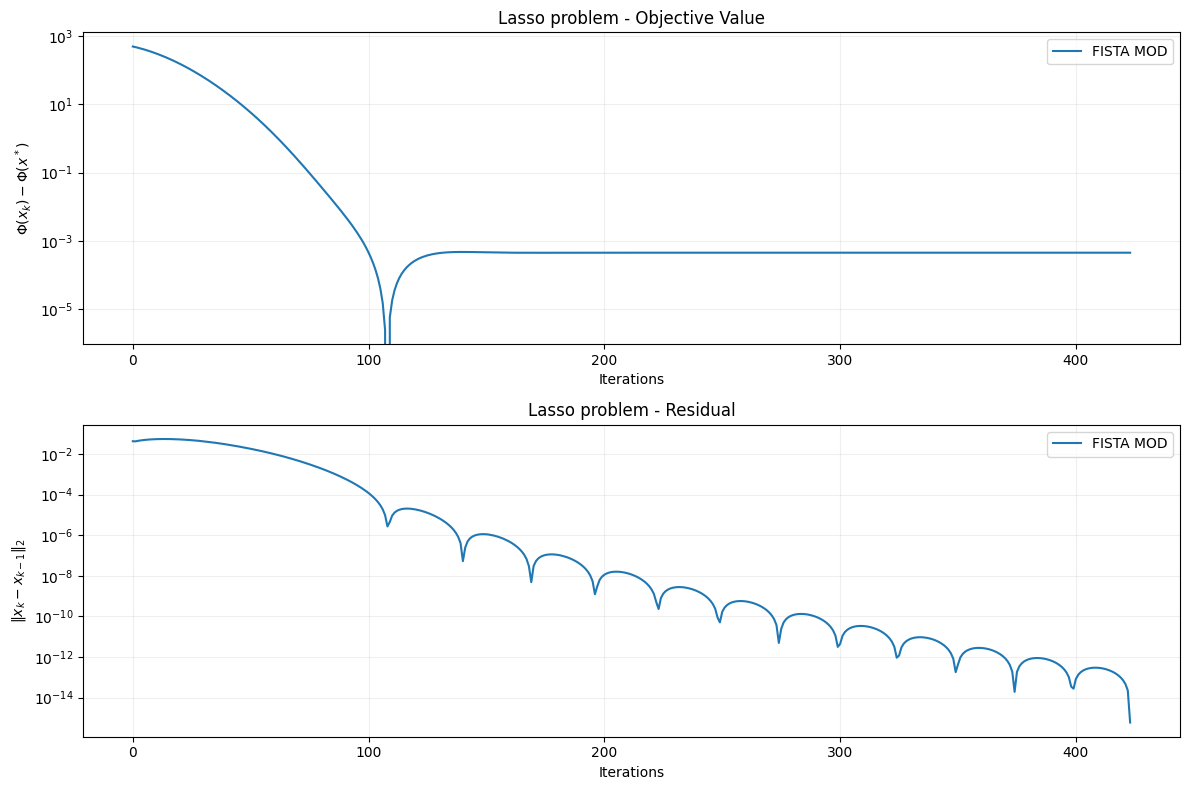

In [16]:
vis.plot_convergence([history], labels=["FISTA MOD"], title="Lasso problem")

# Greedy FISTA


In [17]:
fista_greedy = GreedyFISTA(params)

In [18]:
x, history = fista_greedy.optimize(*lasso)

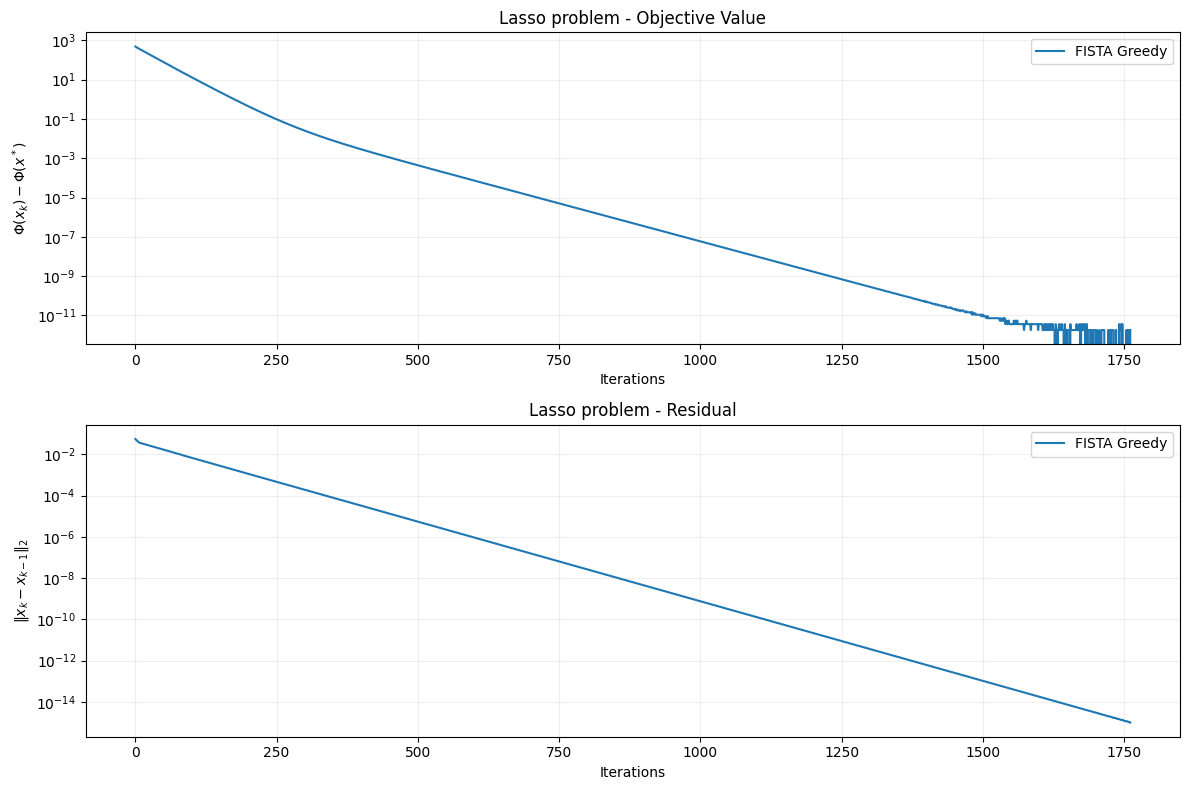

In [19]:
vis.plot_convergence([history], labels=["FISTA Greedy"], title="Lasso problem")

# FISTA Restarting


In [20]:
fista_restart = RestartingFISTA(params)

In [21]:
x, history = fista_restart.optimize(*lasso)

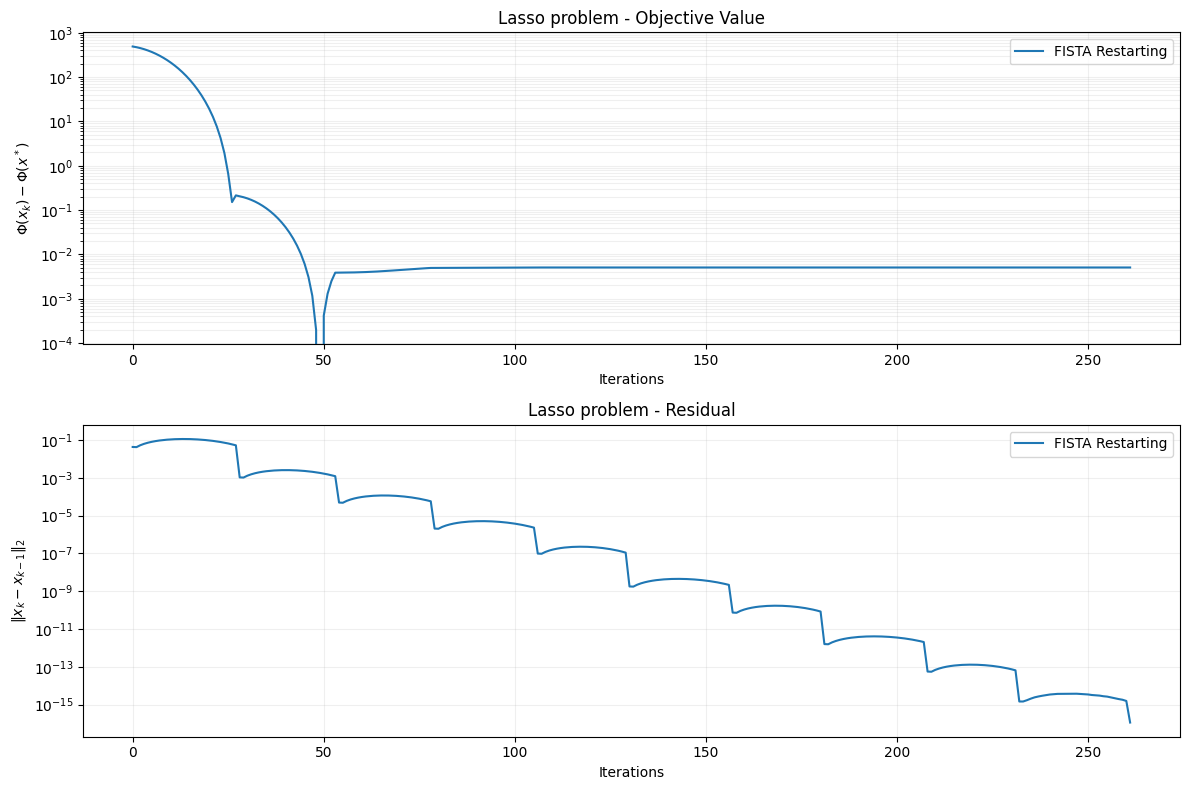

In [22]:
vis.plot_convergence([history], labels=["FISTA Restarting"], title="Lasso problem")